In [322]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

In [323]:
# Load Mortality Dataset
mortality_datatset = pd.read_csv('/content/cleaned_2016-2023-imi-results-long-view.csv')
dataset_start_year = 2016
dataset_end_year = 2023

mortality_datatset.describe()

,YEAR,# of Deaths,# of Cases
count,365.000000,365.000000,365.000000
mean,2018.849315,750.408219,15219.709589
std,1.930604,1640.673599,33592.503271
min,2016.000000,0.000000,14.000000
25%,2017.000000,26.000000,732.000000
50%,2019.000000,160.000000,4044.000000
75%,2020.000000,777.000000,15702.000000
max,2022.000000,13858.000000,259784.000000


In [324]:
# Load Mortality Dataset
mortality_datatset = pd.read_csv('/content/cleaned_2016-2023-imi-results-long-view.csv')

# Specify the directory name
directory_name = "mortality_datatset"

previous_year_value = None

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")


# Drop the # of Cases column
mortality_datatset.drop(columns=['# of Cases'], inplace=True)

# 2019 Law - Medi-Cal expansions for all income-eligible young adults, regardless of immigration status
law_start_year = 2019

# Adding D (Intervention) column values for each row as the law was introduced in 2019
for index, row in mortality_datatset.iterrows():
  if (row['YEAR'] >= law_start_year):
    mortality_datatset.at[index, 'D'] = 1
  elif (row['YEAR'] == (law_start_year - 1)):
    previous_year_value = row["# of Deaths"]
    mortality_datatset.at[index, 'D'] = 0
  else:
    mortality_datatset.at[index, 'D'] = 0


# Renaming column # of Deaths to Y
mortality_datatset.rename(columns={'# of Deaths': 'Y'}, inplace=True)

# Seperate main csv file into csv files for each county
for county, group in mortality_datatset.groupby(['COUNTY']):
  # Remove County column
  group.drop(columns=['COUNTY'], inplace=True)

  # Remove Year column
  group.drop(columns=['YEAR'], inplace=True)

  # Adding T (Year) column values for each row
  group.insert(0, 'T', range(1, group['D'].size + 1))

  intervention_year_index = 1

  # Adding P (Intervention Year) column values for each row
  for index, row in group.iterrows():
    if (row['D'] == 1):
      group.at[index, 'P'] = intervention_year_index
      intervention_year_index += 1
    else:
      group.at[index, 'P'] = 0

  group.to_csv(f'mortality_datatset/{county[0]}.csv', index=False)

Directory 'mortality_datatset' already exists.


In [325]:
from statsmodels.tsa.arima.model import ARIMA
import scipy as sp
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

In [326]:
path = 'mortality_datatset'
dfs = []
output_dfs = []
df_names = []
final_dfs = []

# Specify the directory name
directory_name = "mortality_2019_medi_cal_expansions"

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

# Specify the directory name
directory_name = "mortality_2019_medi_cal_expansions/datasets"

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

# Specify the directory name
directory_name = "mortality_2019_medi_cal_expansions/charts"

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

# Specify the directory name
directory_name = "mortality_2019_medi_cal_expansions/final_datasets"

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

for f in os.listdir(path):
  if f.endswith('.csv'):
    dfs.append(pd.read_csv(f'mortality_datatset/{f}'))
    df_names.append(f.removesuffix(".csv"))


Directory 'mortality_2019_medi_cal_expansions' already exists.
Directory 'mortality_2019_medi_cal_expansions/datasets' already exists.
Directory 'mortality_2019_medi_cal_expansions/charts' already exists.
Directory 'mortality_2019_medi_cal_expansions/final_datasets' already exists.


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Monterey
                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                    7
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -33.754
Date:                Mon, 07 Jul 2025   AIC                             79.508
Time:                        05:10:20   BIC                             79.184
Sample:                             0   HQIC                            75.497
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.6942    193.650      2.627      0.009     129.147     888.241
T            -45.2252     73.664     -0.614      0.539    -189.604      99.153
D            302.5061     61.421      4.925

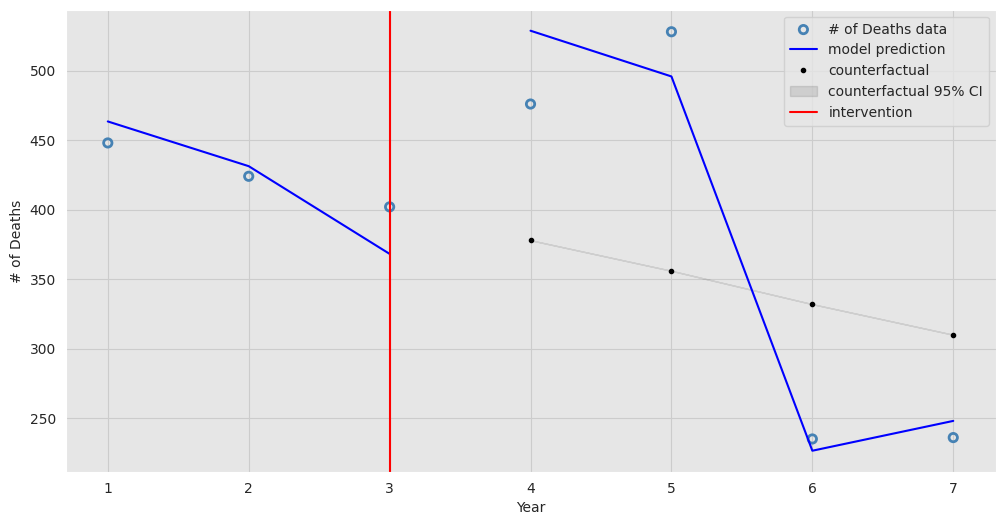

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [327]:
first = True
dataframe_counter = 0

for df in dfs:
  arima_results = ARIMA(df["Y"], df[["T","D","P"]], order=(1,0,0)).fit()

  start = -1
  end = -1

  for index, row in df.iterrows():
    if row["D"] == 1 and start == -1:
      start = index

  end = df.shape[0]

  predictions = arima_results.get_prediction(0, end-1)
  summary = predictions.summary_frame(alpha=0.05)

  arima_cf = ARIMA(df["Y"][:start], df["T"][:start], order=(1,0,0)).fit()

  # Model predictions means
  y_pred = predictions.predicted_mean

  # Counterfactual mean and 95% confidence interval
  y_cf = arima_cf.get_forecast(end - start, exog=df["T"][start:]).summary_frame(alpha=0.05)

  # Plot section
  fig, ax = plt.subplots()

  # Plot bounce rate data
  ax.scatter(df["T"], df["Y"], facecolors='none', edgecolors='steelblue', label="# of Deaths data", linewidths=2)

  # Plot model mean bounce prediction
  ax.plot(df["T"][:start], y_pred[:start], 'b-', label="model prediction")
  ax.plot(df["T"][start:], y_pred[start:], 'b-')

  # Plot counterfactual mean bounce rate with 95% confidence interval
  ax.plot(df["T"][start:], y_cf["mean"], 'k.', label="counterfactual")
  ax.fill_between(df["T"][start:], y_cf['mean_ci_lower'], y_cf['mean_ci_upper'], color='k', alpha=0.1, label="counterfactual 95% CI")


  # Plot line marking intervention moment
  ax.axvline(x = start, color = 'r', label = 'intervention')

  ax.legend(loc='best')
  plt.ylim()
  plt.xlabel("Year")
  plt.ylabel("# of Deaths")

  if first:
    print(df_names[0])
    print(arima_results.summary())
    plt.show()
    first = False

  plt.savefig(f'mortality_2019_medi_cal_expansions/charts/{df_names[dataframe_counter]}.png')
  plt.close()

  predictions_dataset = y_pred[start:]

  output_dfs.append(predictions_dataset.to_frame())
  predictions_dataset.to_csv(f'mortality_2019_medi_cal_expansions/datasets/{df_names[dataframe_counter]}.csv', index=False)



  predictions_dataset = predictions_dataset.to_frame()

  predictions_dataset.loc[-1] = previous_year_value
  predictions_dataset.sort_index(inplace=True)

  predictions_dataset.insert(0, 'Years', range(law_start_year - 1, law_start_year + predictions_dataset['predicted_mean'].size - 1))

  final_dfs.append(predictions_dataset)

  dataframe_counter += 1

In [338]:
!zip -r /content/mortality_2019_medi_cal_expansions/zipped_data /content/mortality_2019_medi_cal_expansions/datasets

updating: content/mortality_2019_medi_cal_expansions/datasets/ (stored 0%)
updating: content/mortality_2019_medi_cal_expansions/datasets/Monterey.csv (deflated 16%)
updating: content/mortality_2019_medi_cal_expansions/datasets/Calaveras.csv (deflated 15%)
updating: content/mortality_2019_medi_cal_expansions/datasets/Alameda.csv (deflated 17%)
updating: content/mortality_2019_medi_cal_expansions/datasets/Lassen.csv (deflated 19%)
updating: content/mortality_2019_medi_cal_expansions/datasets/San Luis Obispo.csv (deflated 7%)
updating: content/mortality_2019_medi_cal_expansions/datasets/Sonoma.csv (deflated 7%)
updating: content/mortality_2019_medi_cal_expansions/datasets/Siskiyou.csv (deflated 8%)
updating: content/mortality_2019_medi_cal_expansions/datasets/San Joaquin.csv (deflated 7%)
updating: content/mortality_2019_medi_cal_expansions/datasets/Orange.csv (deflated 16%)
updating: content/mortality_2019_medi_cal_expansions/datasets/Merced.csv (deflated 17%)
updating: content/mortality

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style(
    style='darkgrid',
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [330]:
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

In [331]:
k0 = WhiteKernel(noise_level=0.3**2, noise_level_bounds=(0.1**2, 0.5**2))

k1 = ConstantKernel(constant_value=2) * \
  ExpSineSquared(length_scale=1.0, periodicity=40, periodicity_bounds=(35, 45))

kernel_1  = k0 + k1

In [332]:
gp1 = GaussianProcessRegressor(
    kernel=kernel_1,
    n_restarts_optimizer=10,
    normalize_y=True,
    alpha=0.0
)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__noise_level is close to the specified upper bound 0.25. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__periodicity is close to the specified lower bound 35. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__noise_level is close to the specified upper bound 0.25. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: 

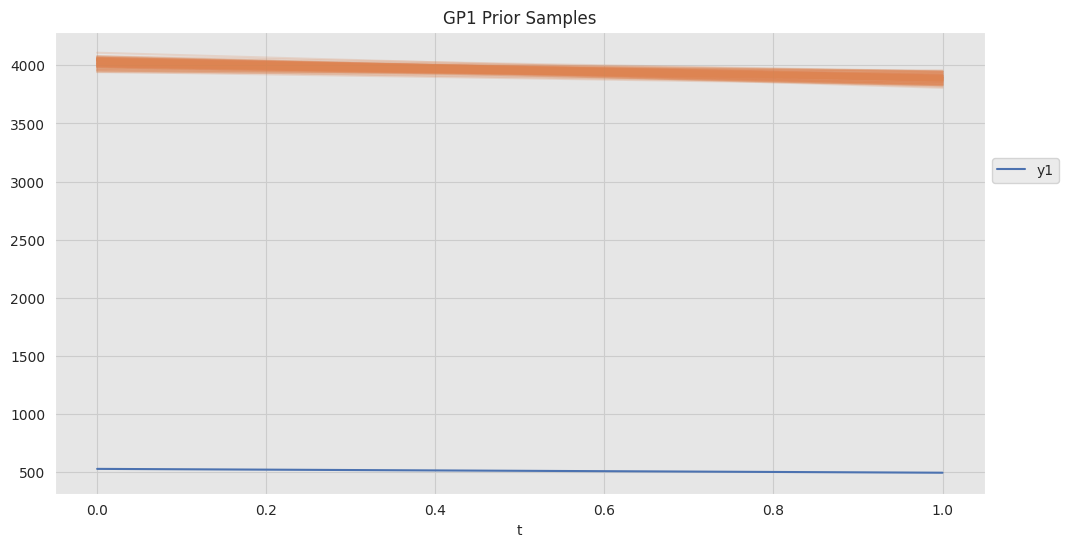

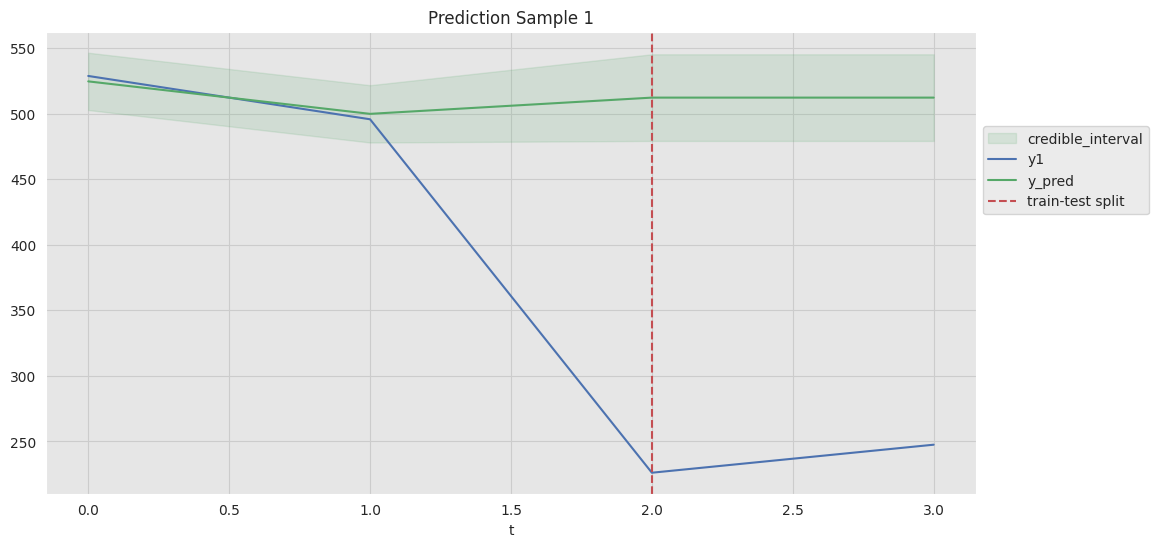

In [335]:
dataframe_counter = 0

for data_df in output_dfs:
  data_df.rename(columns={'predicted_mean': 's1'}, inplace=True)

  # Define target variable.
  data_df['y1'] = data_df['s1']

  # Set noise standard deviation.
  sigma_n = 0.3

  n = data_df.shape[0]

  data_df['epsilon'] = np.random.normal(loc=0, scale=sigma_n, size=n)

  # Add noise to target variable.
  data_df ['y1'] = data_df ['y1'] + data_df ['epsilon']

  if 't' not in data_df.columns:
    data_df.insert(0, 't', range(0, data_df['y1'].size))

  data_df.reset_index(drop=True, inplace=True)

  X = data_df['t'].values.reshape(n, 1)
  y = data_df['y1'].values.reshape(n, 1)

  prop_train = 0.5
  n_train = round(prop_train * n)

  X_train = X[:n_train]
  y_train = y[:n_train]

  X_test = X[n_train:]
  y_test = y[n_train:]

  gp1_prior_samples = gp1.sample_y(X=X_train, n_samples=100)

  if dataframe_counter == 0:
    fig, ax = plt.subplots()
    for i in range(100):
        sns.lineplot(x=X_train[...,0], y = gp1_prior_samples[:, i], color=sns_c[1], alpha=0.2, ax=ax)
    sns.lineplot(x=X_train[...,0], y=y_train[..., 0], color=sns_c[0], label='y1', ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))
    ax.set(title='GP1 Prior Samples', xlabel='t');

  gp1.fit(X_train, y_train)

  GaussianProcessRegressor(alpha=0.0,
                          kernel=WhiteKernel(noise_level=0.09) + 1.41**2 * ExpSineSquared(length_scale=1, periodicity=40),
                          n_restarts_optimizer=10, normalize_y=True)

  # Generate predictions.
  y_pred, y_std = gp1.predict(X, return_std=True)

  data_df['y_pred'] = y_pred
  data_df['y_std'] = y_std
  data_df['y_pred_lwr'] = data_df['y_pred'] - 2*data_df['y_std']
  data_df['y_pred_upr'] = data_df['y_pred'] + 2*data_df['y_std']

  if dataframe_counter == 0:
    fig, ax = plt.subplots()

    ax.fill_between(
        x=data_df['t'],
        y1=data_df['y_pred_lwr'],
        y2=data_df['y_pred_upr'],
        color=sns_c[2],
        alpha=0.15,
        label='credible_interval'
    )

    sns.lineplot(x='t', y='y1', data=data_df, color=sns_c[0], label = 'y1', ax=ax)
    sns.lineplot(x='t', y='y_pred', data=data_df, color=sns_c[2], label='y_pred', ax=ax)

    ax.axvline(n_train, color=sns_c[3], linestyle='--', label='train-test split')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))
    ax.set(title='Prediction Sample 1', xlabel='t', ylabel='');

  num_of_predictions = 10
  X_predictions = []

  for i in range(num_of_predictions):
    X_predictions.append([i + 1])


  y_pred, y_std = gp1.predict(X_predictions, return_std=True)

  current_year = dataset_end_year
  new_df = pd.DataFrame()

  for i in range(num_of_predictions):
    new_df = pd.concat([new_df, (pd.DataFrame({'Years': [current_year], 'predicted_mean': [y_pred[i]]}))])
    current_year += 1

  df = pd.concat([final_dfs[dataframe_counter], new_df])
  df['% Change'] = df['predicted_mean'].pct_change() * 100

  df.to_csv(f'mortality_2019_medi_cal_expansions/final_datasets/{df_names[dataframe_counter]}.csv', index=False)

  dataframe_counter += 1

In [339]:
!zip -r /content/mortality_2019_medi_cal_expansions/zipped_final_data /content/mortality_2019_medi_cal_expansions/final_datasets

!zip -r /content/mortality_2019_medi_cal_expansions/zipped_charts /content/mortality_2019_medi_cal_expansions/charts

updating: content/mortality_2019_medi_cal_expansions/final_datasets/ (stored 0%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/Monterey.csv (deflated 58%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/Calaveras.csv (deflated 58%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/Alameda.csv (deflated 58%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/Lassen.csv (deflated 58%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/San Luis Obispo.csv (deflated 59%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/Sonoma.csv (deflated 58%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/Siskiyou.csv (deflated 59%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/San Joaquin.csv (deflated 58%)
updating: content/mortality_2019_medi_cal_expansions/final_datasets/Orange.csv (deflated 58%)
updating: content/mortality_2019_medi_cal_expansion